Housing Prices Competition for Kaggle Learn Users

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

Getting train data

In [3]:
data_train = pd.read_csv('train.csv')
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Getting test data

In [4]:
data_test = pd.read_csv('train.csv')
data_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Checking how many the Nan values in each columns

In [5]:
data_train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Checking the unique data in a columns

In [6]:
data_train['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

Checking what inside the column to see if it have correlation to sale price

In [7]:
data_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

taking SalePrice as target value

In [8]:
y = data_train.SalePrice

Taking YrSold, GarageArea, LotArea, LandContour, YearBuilt, Foundation, OverallQual, OverallCond, Street, Functional, Bedroom and changing their name for minimize the mistake 

In [9]:
feature_to_test = ["YrSold", "GarageArea", "LotArea", "LandContour", 
    "YearBuilt", "Foundation",  "OverallQual", "OverallCond", 
    "Street", "Functional", "BedroomAbvGr"]

real_name = {
    "YrSold": "Year Sold",
    "GarageArea": "Garage Area",
    "LotArea": "Area in square feet",
    "LandContour": "Flatness of the property",
    "YearBuilt": "Original construction date",
    "Foundation": "Type of foundation",
    "OverallQual": "Overall material and finish quality",
    "OverallCond": "Overall condition rating",
    "Street": "Type of road access",
    "Functional": "Home functionality rating",
    "BedroomAbvGr": "Bedrooms above ground (does NOT include basement bedrooms)"
}

data_train.rename(columns=real_name, inplace=True)
data_train


,Id,MSSubClass,MSZoning,LotFrontage,Area in square feet,Type of road access,Alley,LotShape,Flatness of the property,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,Year Sold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Convert value in column to numeric

In [10]:
data_train['Flatness of the property'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: Flatness of the property, dtype: int64

Lvl to 1, Bnk to 2 , HLS to 3, Low to 4

In [11]:
flatness = {
    'Lvl':1,
    'Bnk':2,
    'HLS':3,
    'Low':4
}

In [12]:
data_train['Flatness of the property'] = data_train['Flatness of the property'].map(flatness)

Converting Type of foundation to numeric

In [13]:
data_train['Type of foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Type of foundation, dtype: int64

PConc to 1, CBlock to 2, BrkTil to 3, Slab to 4, Stone to 5, Wood to 6

In [14]:
mapping = {
    'PConc': 1,
    'CBlock': 2,
    'BrkTil': 3,
    'Slab': 4,
    'Stone': 5,
    'Wood': 6
}

data_train['Type of foundation'] = data_train['Type of foundation'].map(mapping)

Type of road access

In [15]:
data_train['Type of road access'].value_counts()

Pave    1454
Grvl       6
Name: Type of road access, dtype: int64

In [16]:
mapping = {
    'Pave': 1,
    'Grvl': 2
}

data_train['Type of road access'] = data_train['Type of road access'].map(mapping)

Home functionality rating

In [17]:
data_train['Home functionality rating'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Home functionality rating, dtype: int64

In [18]:
mapping = {
    'Typ': 1,
    'Min2': 2,
    'Min1': 3,
    'Mod': 4,
    'Maj1': 5,
    'Maj2': 6,
    'Sev': 7,
}

data_train['Home functionality rating'] = data_train['Home functionality rating'].map(mapping)

Visualizing the raw data for new insight

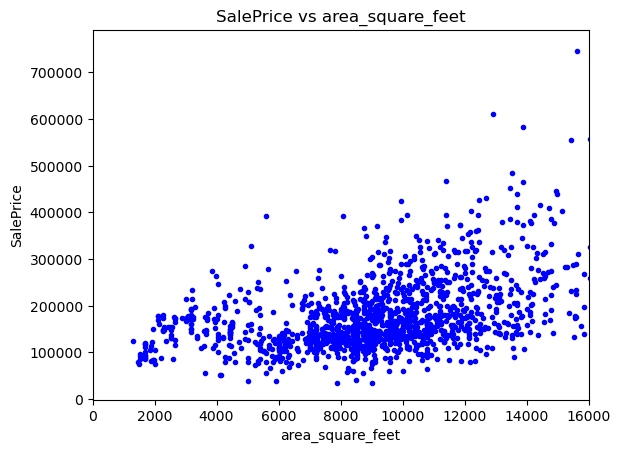

In [19]:
plt.plot(data_train['Area in square feet'], data_train['SalePrice'], 'b.')
plt.xlim(0, 16000)
plt.xlabel('area_square_feet')
plt.ylabel('SalePrice')
plt.title('SalePrice vs area_square_feet')
plt.show()

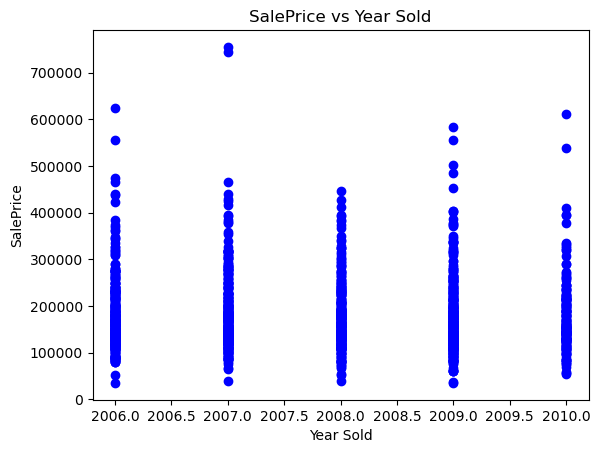

In [20]:
plt.plot(data_train['Year Sold'], data_train['SalePrice'], 'o', color='blue')
plt.xlabel('Year Sold')
plt.ylabel('SalePrice')
plt.title('SalePrice vs Year Sold')
plt.show()

Build the model with new column name

In [21]:
feature_to_test = ["Id", "Year Sold", "Garage Area", "Area in square feet", "Flatness of the property",
        "Original construction date", "Type of foundation",  "Overall material and finish quality",
        "Overall condition rating", "Type of road access", "Home functionality rating",
        "Bedrooms above ground (does NOT include basement bedrooms)"]

X = data_train[feature_to_test].copy()

Spliting data to validation and training sets

In [22]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=10)

In [30]:
val_X

,Id,Year Sold,Garage Area,Area in square feet,Flatness of the property,Original construction date,Type of foundation,Overall material and finish quality,Overall condition rating,Type of road access,Home functionality rating,Bedrooms above ground (does NOT include basement bedrooms)
854,855,2006,454,17920,1,1955,2,5,4,1,1,3
381,382,2006,572,7200,1,2006,1,7,5,1,1,2
816,817,2006,275,11425,1,1954,2,5,6,1,1,2
577,578,2006,564,11777,1,1966,2,5,6,1,1,3
35,36,2006,691,13418,1,2004,1,8,5,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
708,709,2007,400,9018,1,2007,1,7,5,1,1,3
1404,1405,2006,936,10410,1,1915,1,3,4,1,1,3
151,152,2008,866,13891,1,2007,1,8,5,1,1,2
1184,1185,2007,995,35133,1,1963,2,5,4,2,1,3


In [23]:
train_X

,Id,Year Sold,Garage Area,Area in square feet,Flatness of the property,Original construction date,Type of foundation,Overall material and finish quality,Overall condition rating,Type of road access,Home functionality rating,Bedrooms above ground (does NOT include basement bedrooms)
567,568,2010,532,10171,1,2004,1,7,5,1,1,3
1416,1417,2010,560,11340,1,1885,1,4,6,1,1,4
1372,1373,2006,583,9750,1,1998,1,7,6,1,1,3
172,173,2006,504,5306,1,1987,1,7,7,1,1,2
810,811,2006,484,10140,1,1974,2,6,6,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1393,1394,2008,672,10800,1,1905,3,6,7,1,1,3
1344,1345,2007,440,11103,1,2006,1,7,5,1,1,3
527,528,2008,858,14948,1,2008,1,9,5,1,1,3
1149,1150,2009,324,9000,1,1920,1,7,9,1,1,3


Build The model 

Define many model for searching the best model
"""

In [33]:
model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model2 = RandomForestRegressor(n_estimators=200, random_state=0)
model3 = RandomForestRegressor(n_estimators=200, random_state=42, criterion='absolute_error')
model4 = RandomForestRegressor(n_estimators=200, random_state=42, criterion='squared_error', max_depth=4)

model = [model1, model2, model3, model4]
# model.fit(train_X, train_y)

In [25]:
feature_to_test = ["YrSold", "GarageArea", "LotArea", "LandContour", 
    "YearBuilt", "Foundation",  "OverallQual", "OverallCond", 
    "Street", "Functional", "BedroomAbvGr"]

real_name = {
    "YrSold": "Year Sold",
    "GarageArea": "Garage Area",
    "LotArea": "Area in square feet",
    "LandContour": "Flatness of the property",
    "YearBuilt": "Original construction date",
    "Foundation": "Type of foundation",
    "OverallQual": "Overall material and finish quality",
    "OverallCond": "Overall condition rating",
    "Street": "Type of road access",
    "Functional": "Home functionality rating",
    "BedroomAbvGr": "Bedrooms above ground (does NOT include basement bedrooms)"
}

data_test.rename(columns=real_name, inplace=True)

feature_to_test = ["Id", "Year Sold", "Garage Area", "Area in square feet", "Flatness of the property",
        "Original construction date", "Type of foundation",  "Overall material and finish quality",
        "Overall condition rating", "Type of road access", "Home functionality rating",
        "Bedrooms above ground (does NOT include basement bedrooms)"]

mapping = {
    'Typ': 1,
    'Min2': 2,
    'Min1': 3,
    'Mod': 4,
    'Maj1': 5,
    'Maj2': 6,
    'Sev': 7,
}

data_train['Home functionality rating'] = data_train['Home functionality rating'].map(mapping)



test_X = data_test[feature_to_test]

In [34]:
def search_best_model(model, x_train=train_X, x_val=val_X, y_train=train_y, y_val=val_y):
    model.fit(x_train, y_train)
    prediction = model.predict(x_val)
    mea = mean_absolute_error(y_val, prediction)
    return mea

for i in model:
    mea = search_best_model(i)
    print(i, mea)


RandomForestRegressor(random_state=42) 24968.32402739726
RandomForestRegressor(n_estimators=200, random_state=0) 24997.492013698633
RandomForestRegressor(criterion='absolute_error', n_estimators=200,
                      random_state=42) 24921.167383561642
RandomForestRegressor(max_depth=4, n_estimators=200, random_state=42) 29699.486735454655


In [37]:
model = model3
model.fit(train_X, train_y)
prediction = model.predict(val_X)
mea = mean_absolute_error(val_y, prediction)

In [ ]:
gradient_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='squared_error')
gradient_model.fit(train_X, train_y)

GradientBoostingRegressor(max_depth=1, random_state=0)

In [ ]:
gradient_prediction = gradient_model.predict(val_X)

print(mean_squared_error(gradient_prediction, val_y))

1484459859.9730375


AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [ ]:
pred_csv = pd.DataFrame({'Id': val_X['Id'], 'SalePrice': prediction})

pred_csv.to_csv('submission_tree.csv', index=False)

In [ ]:
pred_csv = pd.DataFrame({'Id': val_X['Id'], 'SalePrice': gradient_prediction})

pred_csv.to_csv('submission_gradient.csv', index=False)

pred_csv = pd.DataFrame({'Id': val_X['Id'], 'SalePrice': gradient_prediction})

pred_csv.to_csv('submission_gradient.csv', index=False)